# Análise Exploratória do Churn
**Autor**: 
Luis Felipe Barbosa Petrillo  
**LinkedIn**: https://www.linkedin.com/in/luisfelipebp/  
**GitHub**: https://github.com/luisfelipebp


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

df_graphic = pd.read_csv("./Telco-Customer-Churn.csv")

## Variáveis Categóricas Simples
 

### Análise de Variáveis Categóricas (Countplots)

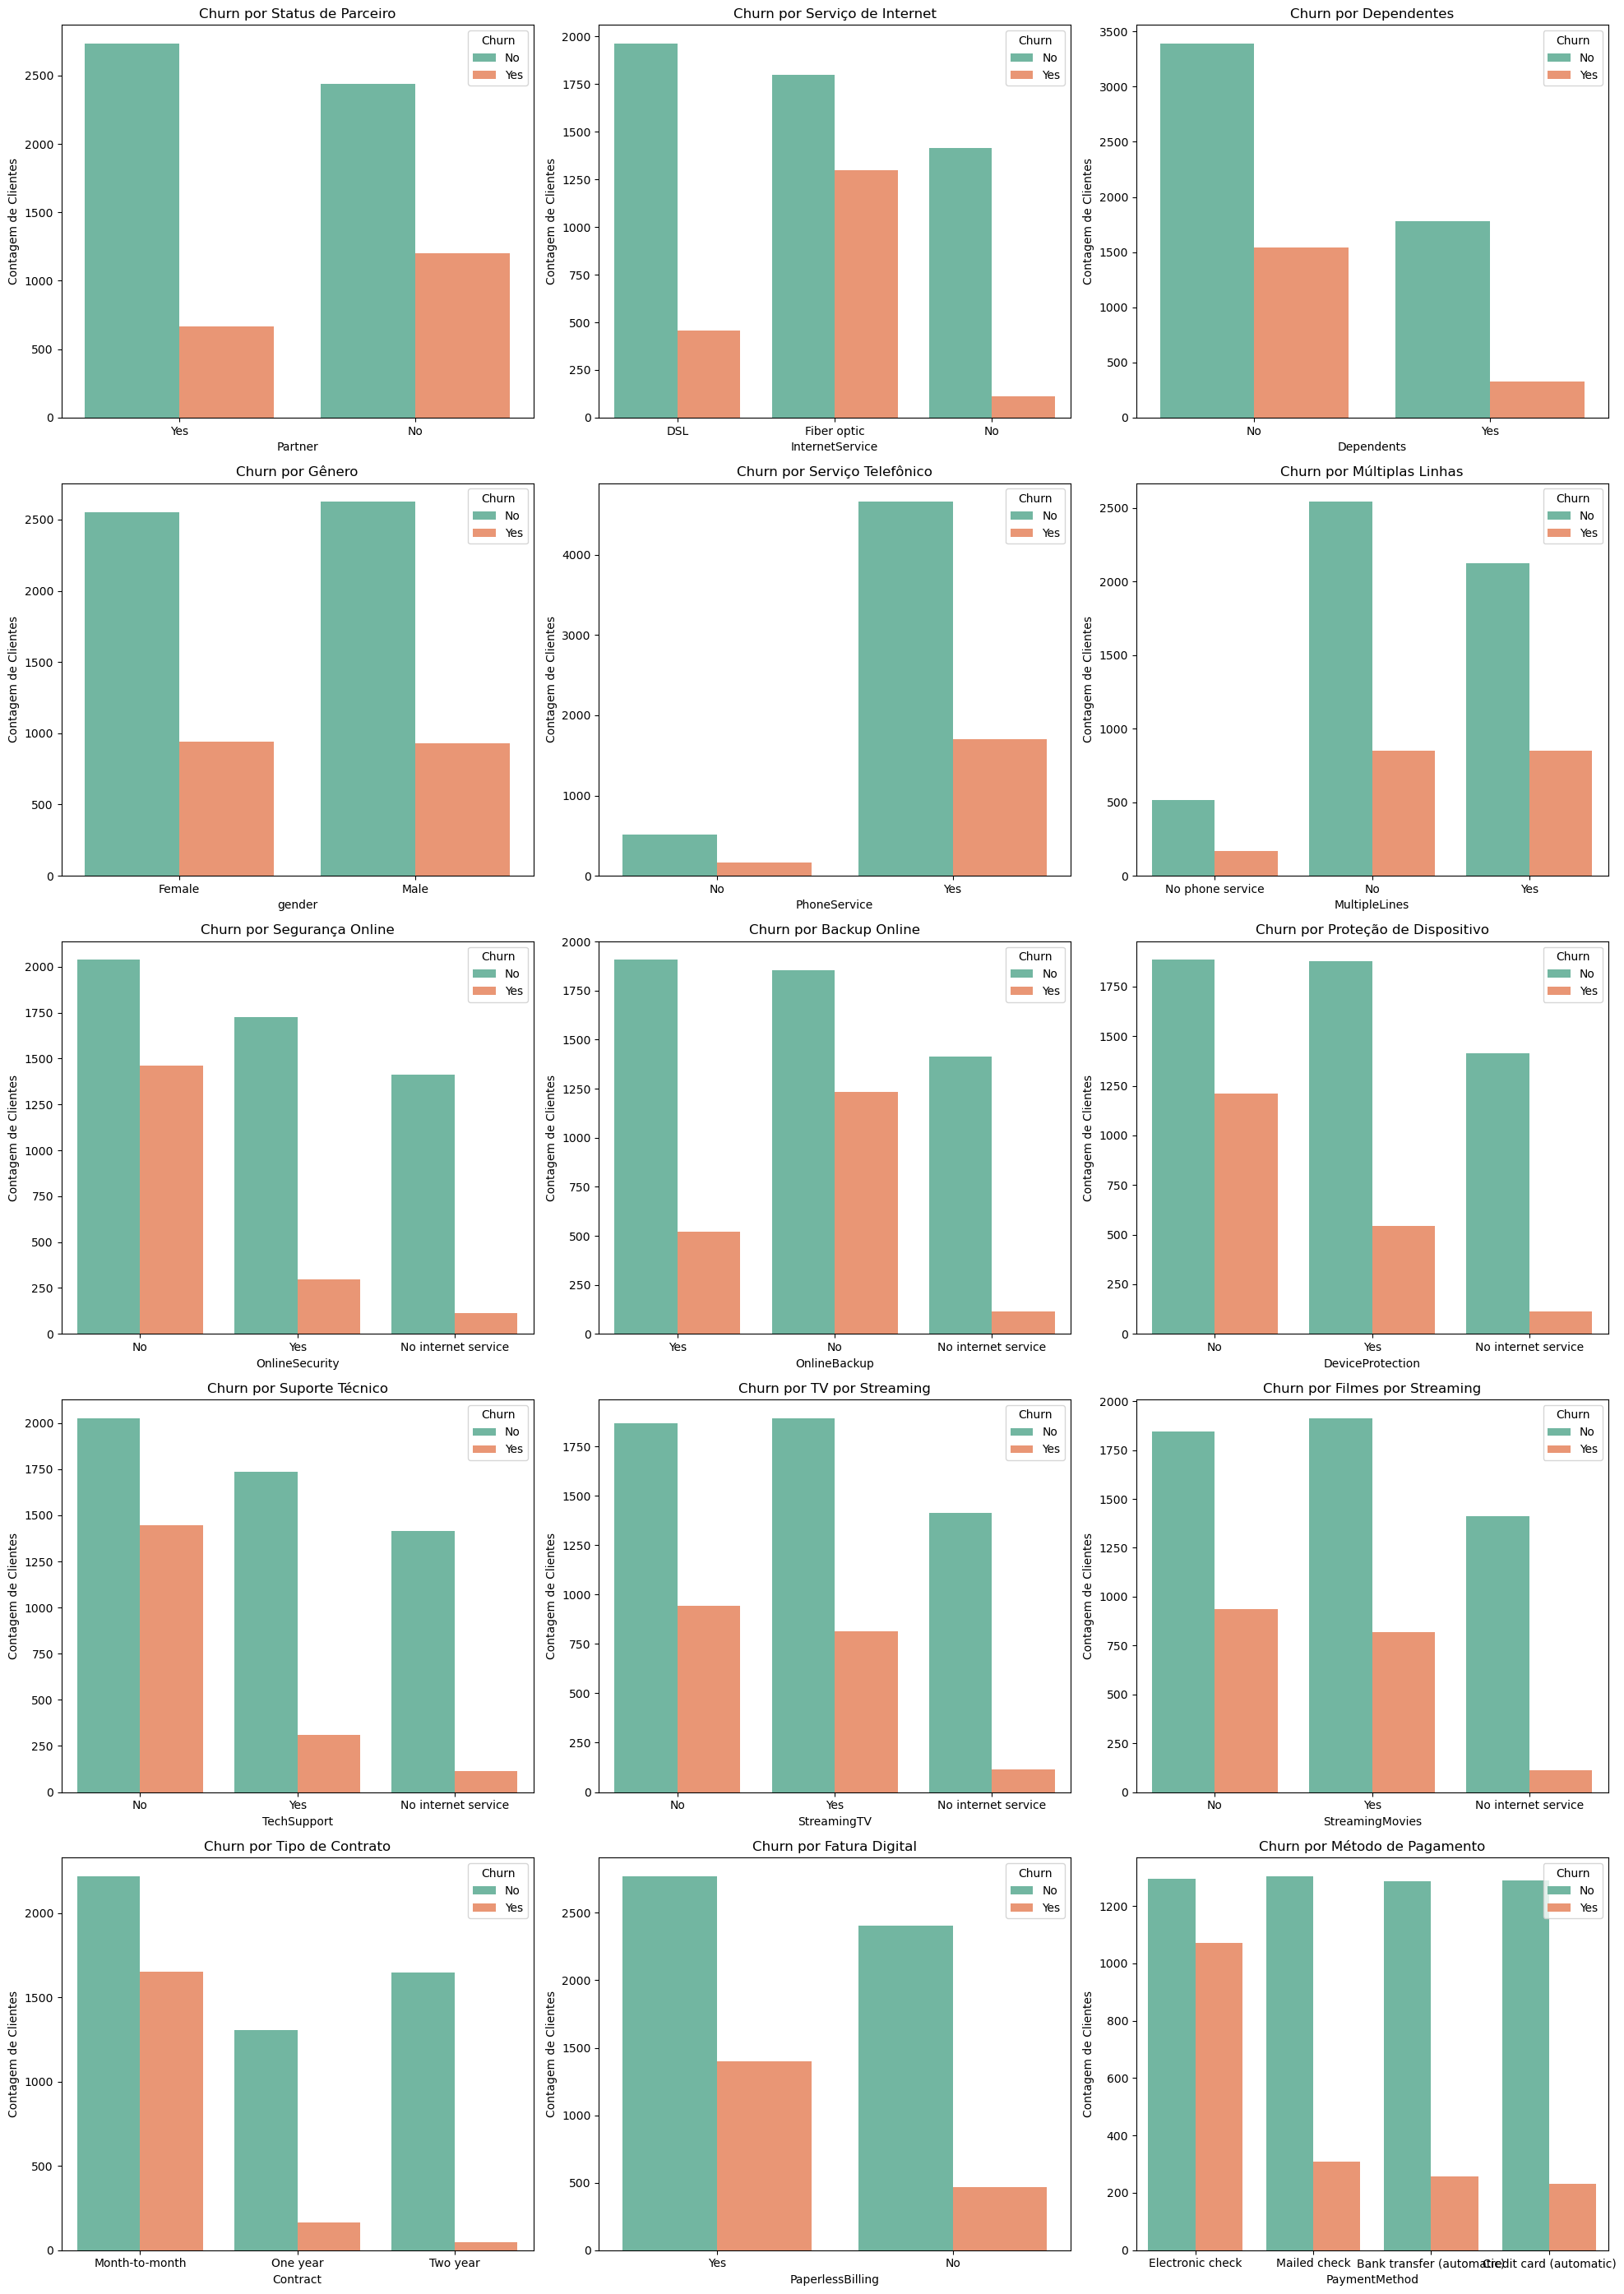

In [56]:
fig, axes = plt.subplots(5, 3, figsize=(20, 28))
axes = axes.flatten() 

titulos = {
    'Partner': 'Status de Parceiro',
    'InternetService': 'Serviço de Internet',
    'Dependents': 'Dependentes',
    'gender': 'Gênero',
    'PhoneService': 'Serviço Telefônico',
    'MultipleLines': 'Múltiplas Linhas',
    'OnlineSecurity': 'Segurança Online',
    'OnlineBackup': 'Backup Online',
    'DeviceProtection': 'Proteção de Dispositivo',
    'TechSupport': 'Suporte Técnico',
    'StreamingTV': 'TV por Streaming',
    'StreamingMovies': 'Filmes por Streaming',
    'Contract': 'Tipo de Contrato',
    'PaperlessBilling': 'Fatura Digital',
    'PaymentMethod': 'Método de Pagamento'
}

variaveis = [
    'Partner', 'InternetService', 'Dependents',
    'gender', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

for i, variavel in enumerate(variaveis):
    sns.countplot(
        data=df_graphic,
        x=variavel,
        ax=axes[i],
        palette='Set2',
        hue='Churn'
    )
    axes[i].set_title(f'Churn por {titulos[variavel]}')
    axes[i].set_ylabel('Contagem de Clientes')

plt.tight_layout()
plt.show()

Os countplots para as variáveis:

- InternetService (Fiber optic)
- Dependents (No)
- PhoneService (Yes)
- MultipleLines (Yes/No)
- OnlineSecurity/Backup/DeviceProtection/TechSupport (No)
- StreamingTV/StreamingMovies (Yes/No)
- Contract (Month-to-month)
- PaperlessBilling (Yes)
- PaymentMethod (Electronic check)

mostraram altas contagens absolutas de clientes que cancelaram o serviço. Porém, é crucial analisar as proporções de Churn em relação a essas categorias.

### Taxa de Churn por Variáveis Binárias (Heatmap)

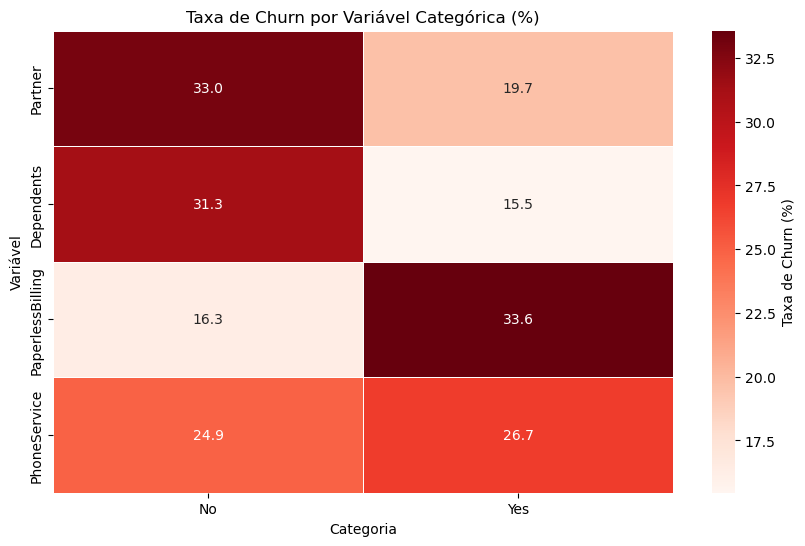

In [8]:
variaveis_binarias = ['Partner', 'Dependents', 'PaperlessBilling', 'PhoneService']

matriz_churn = pd.DataFrame()
for var in variaveis_binarias:
    tabela = pd.crosstab(df_graphic[var], df_graphic['Churn'], normalize='index')['Yes'] * 100
    matriz_churn[var] = tabela

matriz_churn = matriz_churn.T 

plt.figure(figsize=(10, 6))
sns.heatmap(
    matriz_churn,
    annot=True,
    fmt='.1f',
    cmap='Reds',
    linewidths=0.5,
    cbar_kws={'label': 'Taxa de Churn (%)'}
)
plt.title('Taxa de Churn por Variável Categórica (%)')
plt.xlabel('Categoria')
plt.ylabel('Variável')
plt.show()

A análise do gráfico mostra que a taxa de churn é significativamente maior entre clientes que não têm parceiro (33,0%) e que não possuem dependentes (31,3%), em comparação com aqueles que têm parceiro (19,7%) ou dependentes (15,5%). Além disso, clientes que utilizam faturamento em papel apresentam uma taxa de churn muito mais alta (33,6%) do que aqueles que não utilizam (16,3%). Por outro lado, para a variável PhoneService, a diferença entre as categorias é pequena (24,9% para "No" e 26,7% para "Yes"), indicando que esse fator não influencia de forma relevante a taxa de churn.

## Taxa de Churn por Variáveis Qualitativas com diversos valores (Heatmap)

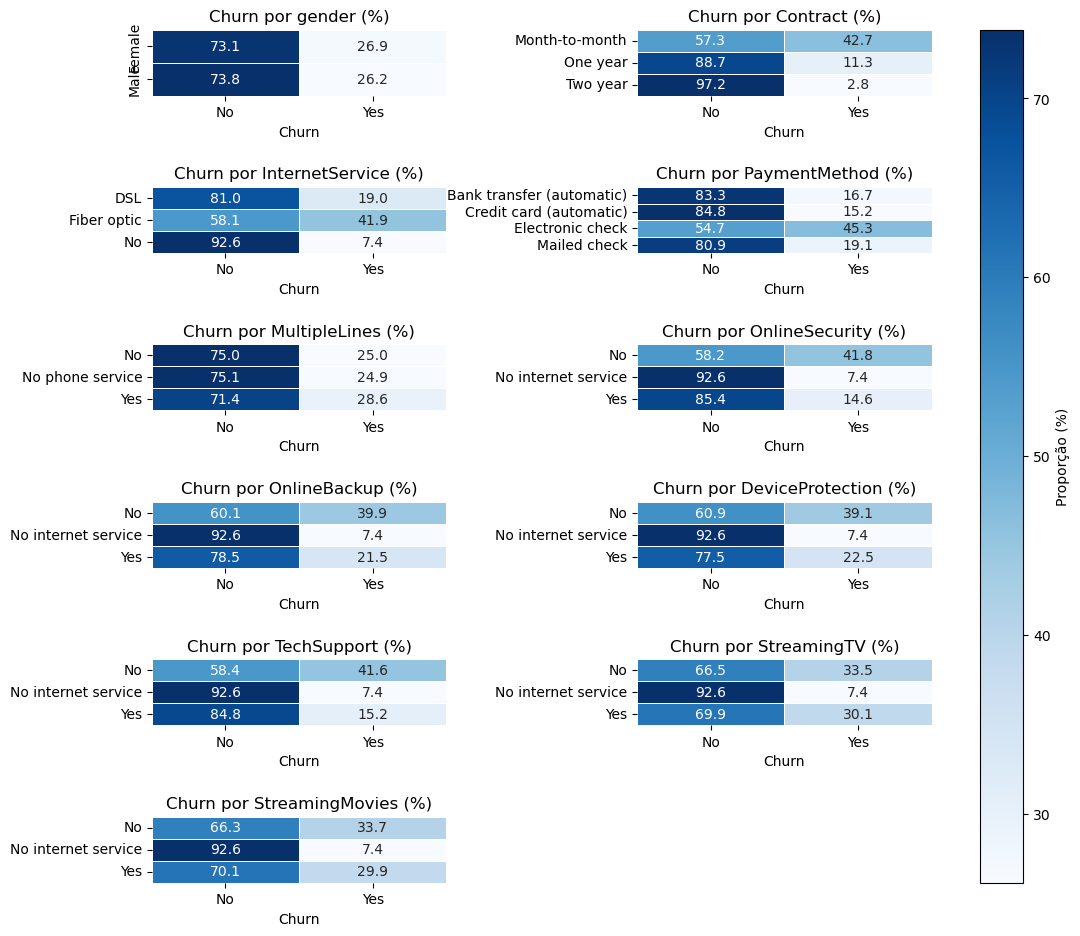

In [9]:
variaveis = [
    'gender',            
    'Contract',          
    'InternetService',   
    'PaymentMethod',     
    'MultipleLines',
    'OnlineSecurity',  
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport',
    'StreamingTV', 
    'StreamingMovies'
]

fig, axes = plt.subplots(6, 2, figsize=(12, 10))
axes = axes.flatten() 

for i, var in enumerate(variaveis):
    tabela = pd.crosstab(df_graphic[var], df_graphic['Churn'], normalize='index') * 100
    
    sns.heatmap(
        tabela,
        annot=True,
        fmt='.1f',
        cmap='Blues',
        ax=axes[i],
        cbar=False,
        linewidths=0.5
    )
    axes[i].set_title(f'Churn por {var} (%)')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel('')
    
    axes[-1].axis('off')

plt.tight_layout(pad=3.0, h_pad=2.0, w_pad=3.5) 
fig.colorbar(axes[0].collections[0], ax=axes, label='Proporção (%)')
plt.show()

A análise dos gráficos confirma que a taxa de churn é mais elevada entre clientes com contrato mensal (month-to-month, 42,7%), serviço de internet por fibra óptica (41,9%), pagamento via electronic check (45,3%), e entre aqueles que não utilizam serviços de segurança online (41,8%), backup online (39,9%), proteção de dispositivo (39,1%), suporte técnico (41,6%), e streaming (33,7% para filmes e 33,5% para TV). Esses resultados indicam que contratos mais flexíveis, métodos de pagamento menos automáticos e ausência de serviços adicionais de proteção e suporte estão associados a maiores taxas de churn.

## Variavéis Quantitativas


<Axes: >

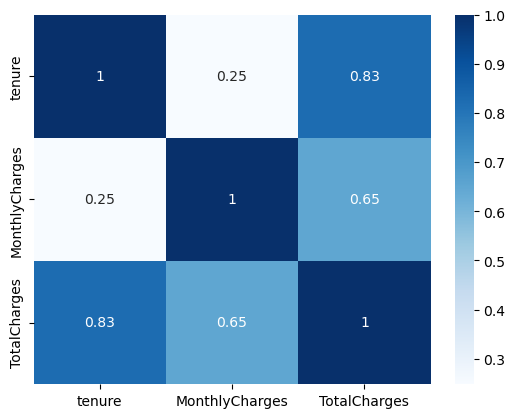

In [54]:
numeric_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.heatmap(df_graphic[numeric_vars].corr(), cmap='Blues', annot=True)

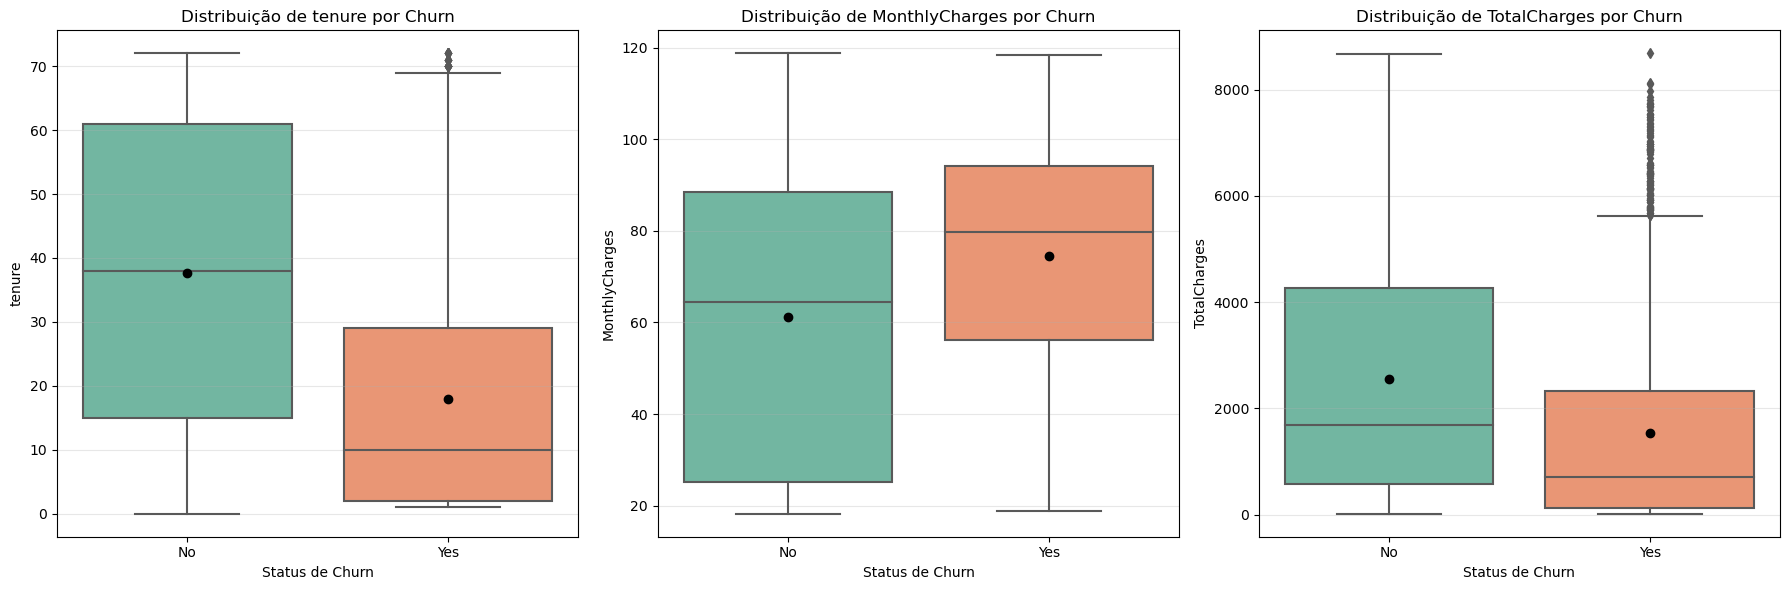

In [51]:
plt.figure(figsize=(18, 6))

variaveis_quantitativas = ['tenure', 'MonthlyCharges', 'TotalCharges']

df_graphic['TotalCharges'] = pd.to_numeric(df_graphic['TotalCharges'], errors='coerce')

for i, var in enumerate(variaveis_quantitativas, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(
        x='Churn',
        y=var,
        data=df_graphic,
        palette='Set2',
        showmeans=True, 
        meanprops={'marker':'o', 'markerfacecolor':'black', 'markeredgecolor':'black'}
    )
    
    plt.title(f'Distribuição de {var} por Churn')
    plt.xlabel('Status de Churn')
    plt.ylabel(var)
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Analisando os boxplots apresentados,podemos observar:

No gráfico de tenure (tempo como cliente), observamos que:

- Clientes que cancelaram (churn = Yes) têm mediana de permanência muito menor (cerca de 10 meses), com concentração entre 1-30 meses
- Clientes que permaneceram têm mediana de aproximadamente 38 meses

Para MonthlyCharges (cobranças mensais):

- Clientes que cancelaram apresentam valores mensais mais altos (mediana ≈ 80)

- Clientes que permaneceram têm cobranças mensais menores (mediana ≈ 65)

- A distribuição de valores para quem cancelou é mais concentrada na faixa superior

No caso de TotalCharges (cobranças totais):

- Clientes que cancelaram têm valores totais significativamente menores (mediana ≈ 700)

- Clientes que permaneceram apresentam valores totais mais altos (mediana ≈ 1700)

- Há numerosos outliers no grupo de churn, indicando alguns clientes que, apesar de terem gasto valores elevados, ainda optaram por cancelar.

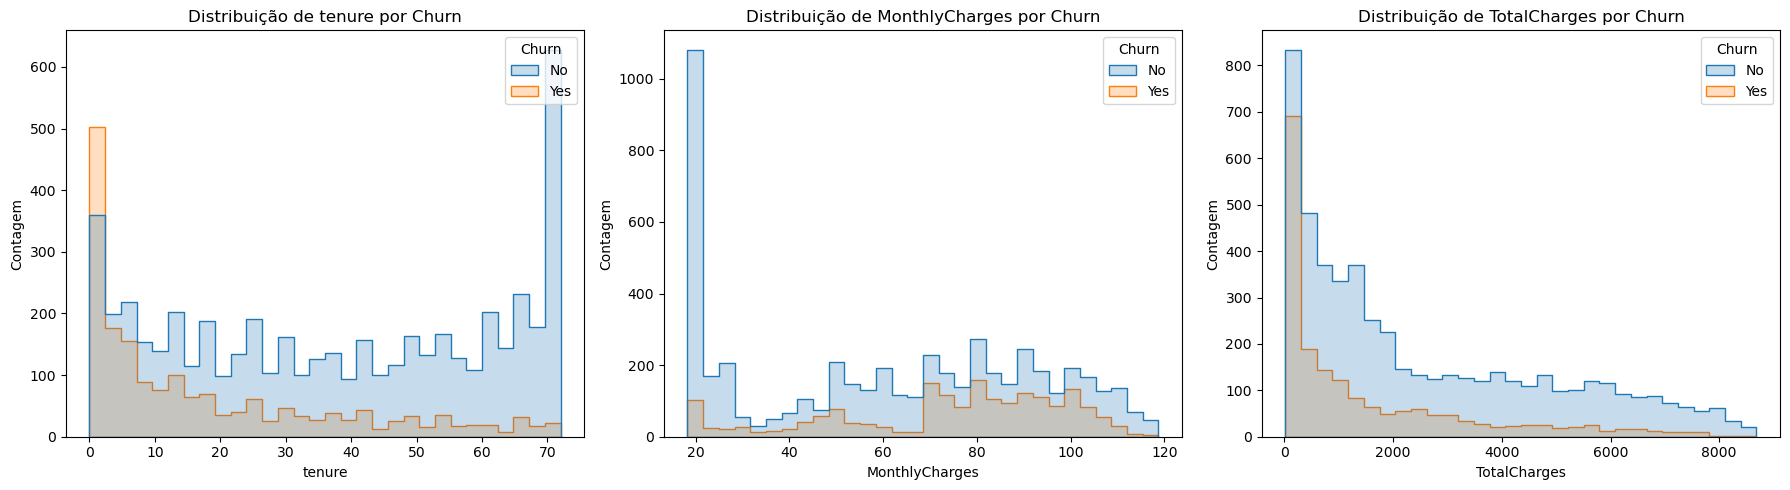

In [53]:
plt.figure(figsize=(18, 5))

variaveis = ['tenure', 'MonthlyCharges', 'TotalCharges']

df_graphic['TotalCharges'] = pd.to_numeric(df_graphic['TotalCharges'], errors='coerce')

for i, var in enumerate(variaveis, 1):
    plt.subplot(1, 3, i)
    sns.histplot(
        data=df_graphic,
        x=var,
        hue='Churn',
        element='step',
        palette='tab10',
        bins=30
    )
    plt.title(f'Distribuição de {var} por Churn')
    plt.xlabel(var)
    plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

Analisando os histogramas apresentados, podemos observar:

Tenure: Os gráficos mostram que clientes com menor tempo de casa (tenure baixo) têm uma incidência muito maior de churn, enquanto aqueles com maior tempo tendem a permanecer na empresa. Isso indica que o risco de cancelamento é mais alto nos primeiros meses de contrato.

MonthlyCharges: Embora clientes que cancelam apresentem uma leve tendência a ter cobranças mensais mais altas, a sobreposição das distribuições indica que o valor mensal não é um fator isolado determinante para churn.

TotalCharges: Clientes com valores totais menores de gastos tendem a cancelar mais, o que está relacionado ao menor tempo de permanência. Ou seja, quanto menor o total gasto, maior a probabilidade de churn, pois esses clientes geralmente são mais novos na base

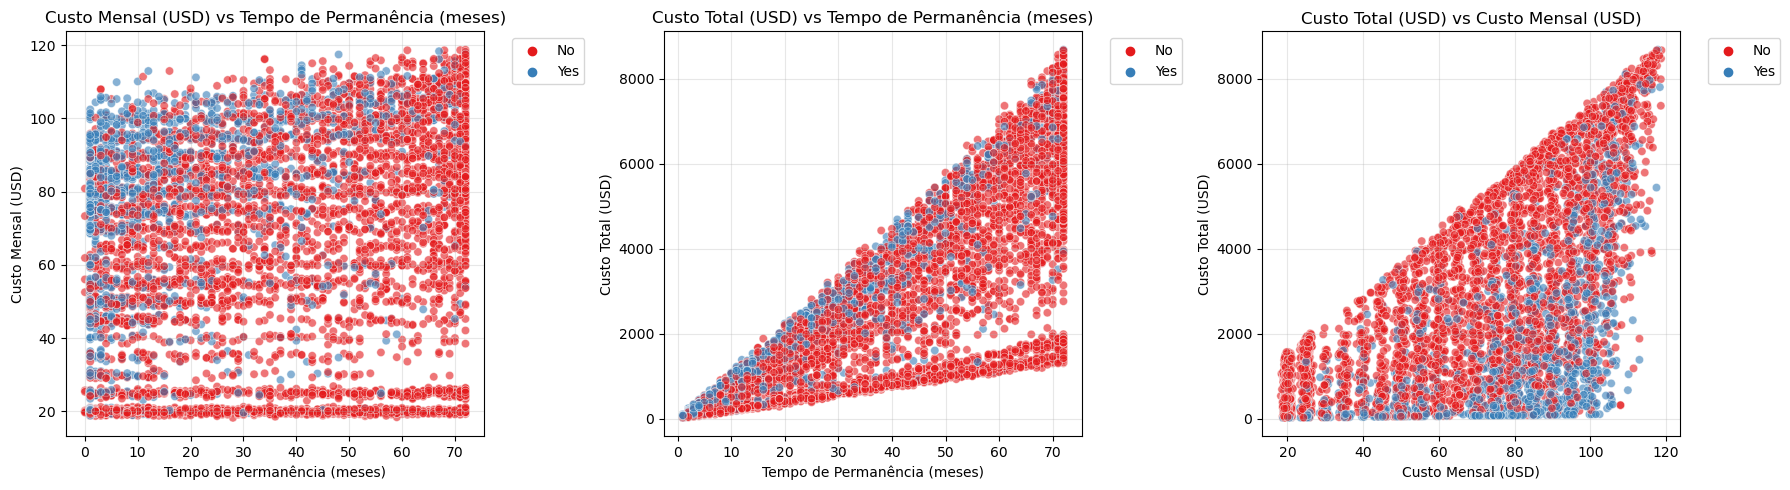

In [55]:
plt.figure(figsize=(18, 5))

titulos = {
    'tenure': 'Tempo de Permanência (meses)',
    'MonthlyCharges': 'Custo Mensal (USD)',
    'TotalCharges': 'Custo Total (USD)'
}

pares = [
    ('tenure', 'MonthlyCharges'),
    ('tenure', 'TotalCharges'),
    ('MonthlyCharges', 'TotalCharges')
]

for i, (x_var, y_var) in enumerate(pares, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(
        data=df_graphic,
        x=x_var,
        y=y_var,
        hue='Churn',
        palette='Set1',
        alpha=0.6
    )
    plt.title(f'{titulos[y_var]} vs {titulos[x_var]}')
    plt.xlabel(titulos[x_var])
    plt.ylabel(titulos[y_var])
    plt.grid(alpha=0.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Custo Mensal(MonthlyCharges) vs Tempo de Permanência(tenure) (gráfico da esquerda):
Não existe uma relação clara entre custo mensal e tempo de permanência. Os pontos estão distribuídos de forma uniforme pelo gráfico, indicando que clientes com diferentes tempos de permanência podem ter custos mensais variados.

Custo Total(TotalCharges) vs Tempo de Permanência(tenure) (gráfico do meio):
Existe uma forte relação positiva - quanto maior o tempo de permanência, maior o custo total acumulado. Porém, é importante notar que os clientes que cancelaram (pontos azuis) estão concentrados principalmente na região de baixo tempo de permanência e baixo custo total.

Custo Total(TotalCharges) vs Custo Mensal(MonthlyCharges) (gráfico da direita):
Clientes com churn (azul) aparecem mais concentrados em certas faixas de valores, particularmente em custos mensais médios a altos com custos totais relativamente baixos.